In [118]:
import numpy as np 
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,random_split,Dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [119]:
# train = pd.read_csv('C:/Users/MJ/Desktop/FunctionApproximation/train.csv')
# test =pd.read_csv('C:/Users/MJ/Desktop/FunctionApproximation/test.csv')
# val_size = int(0.2 * len(train))
# train_size=len(train)-val_size
# train, valid = random_split(train,[train_size, val_size])

In [120]:
cuda = True if torch.cuda.is_available() else False

In [121]:
train=pd.read_csv("C:/Users/MJ/Desktop/FunctionApproximation/train.csv")
test=pd.read_csv("C:/Users/MJ/Desktop/FunctionApproximation/test.csv")
test_x=torch.tensor(test.drop(['id'],axis=1).values,dtype=torch.float32)


In [122]:
class FADataset(Dataset):
    def __init__(self, data):
        super().__init__()
        self.x=torch.tensor(data.drop(['id','y'],axis=1).values,dtype=torch.float32)
        self.y=torch.tensor(data['y'].values,dtype=torch.float32)
        
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        data=self.x[idx]
        target=self.y[idx]
        return data,target,idx

    # def update_loss_value(self, idx):
    #     self.flag[idx] = True
        

In [123]:
batch_size=80
dataset=FADataset(train)
trainset, validset = random_split(dataset, [0.9, 0.1])
train_dl= DataLoader(trainset, shuffle=True, batch_size=batch_size)
valid_dl= DataLoader(validset, shuffle=True, batch_size=batch_size)
test_dl=DataLoader(test_x,shuffle=False, batch_size=batch_size)

In [124]:
class MLP(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2,num_hidden3,num_hidden4,num_hidden5,num_hidden6, output_dim):
        super().__init__()
        self.model=nn.Sequential(nn.Linear(input_dim,num_hidden1),
                                nn.ReLU(True),
                                nn.Linear(num_hidden1,num_hidden2),
                                nn.ReLU(True),
                                nn.Linear(num_hidden2,num_hidden3),
                                nn.ReLU(True),
                                nn.Linear(num_hidden3,num_hidden4),
                                nn.ReLU(True),  
                                nn.Linear(num_hidden4,num_hidden5),
                                nn.ReLU(True),  
                                nn.Linear(num_hidden5,num_hidden6),
                                nn.Linear(num_hidden6,output_dim),
                                )
    def forward(self, x):
        return self.model(x)


In [125]:
model= MLP(input_dim=2, num_hidden1=100,num_hidden2=200,num_hidden3=300,num_hidden4=512,num_hidden5=256,num_hidden6=128, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [126]:
num_epochs = 50
losses=[]
size = len(train_dl)
model.train()
for epoch in range(num_epochs):
    for batch,(data, target,idx) in enumerate(train_dl):
        outputs = model(data)
        loss = criterion(outputs.reshape(-1), target.reshape(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 80 == 0: #每通過batch個數量的資料就輸出一次損失的值
            print(f"loss: {loss.item():>7f} ")
            losses.append(loss.item())


loss: 1.495776 
loss: 0.201273 
loss: 0.167767 
loss: 0.116052 
loss: 0.136443 
loss: 0.113442 
loss: 0.103523 
loss: 0.132939 
loss: 0.113273 
loss: 0.109854 
loss: 0.073306 
loss: 0.089180 
loss: 0.080919 
loss: 0.090724 
loss: 0.061782 
loss: 0.064503 
loss: 0.080805 
loss: 0.060232 
loss: 0.066926 
loss: 0.044417 
loss: 0.071651 
loss: 0.044536 
loss: 0.048827 
loss: 0.051528 
loss: 0.055397 
loss: 0.031975 
loss: 0.036510 
loss: 0.037536 
loss: 0.023830 
loss: 0.023254 
loss: 0.028160 
loss: 0.040798 
loss: 0.041904 
loss: 0.029360 
loss: 0.041406 
loss: 0.031268 
loss: 0.025708 
loss: 0.025147 
loss: 0.037070 
loss: 0.024652 
loss: 0.020387 
loss: 0.021848 
loss: 0.024335 
loss: 0.032401 
loss: 0.027631 
loss: 0.019894 
loss: 0.024852 
loss: 0.033490 
loss: 0.028904 
loss: 0.027585 
loss: 0.020706 
loss: 0.031513 
loss: 0.026888 
loss: 0.025260 
loss: 0.026181 
loss: 0.022972 
loss: 0.017736 
loss: 0.023167 
loss: 0.019731 
loss: 0.019758 
loss: 0.024836 
loss: 0.023579 
loss: 0.

In [134]:
sum(losses)/len(losses)

0.05562693645246327

In [135]:
min(losses)

0.015074972994625568

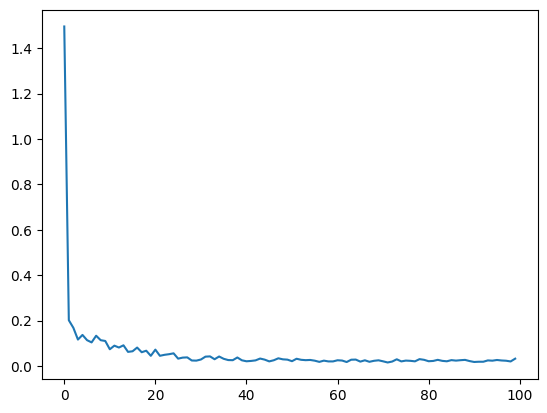

In [136]:
plt.plot(losses)

In [137]:
model.eval()
for batch,(data, target,idx) in enumerate(valid_dl):
    outputs = model(data)
    loss = criterion(outputs.reshape(-1), target.reshape(-1))
print(f"loss: {loss.item():>7f} ")

loss: 0.028168 


In [138]:
model.eval()
output=[]
for i in range(len(test_x)):
    output.append((model(test_x[i])).item())

In [139]:
min(output)

0.3327551484107971

In [140]:
sample_submission=pd.read_csv("C:/Users/MJ/Desktop/FunctionApproximation/sample_submission.csv")
sample_submission['y']=output
sample_submission.to_csv("C:/Users/MJ/Desktop/sample_submission.csv",index=False)